In [1]:
import numpy as np
import pandas as pd

In [2]:
df0 = pd.read_csv("DATA/DMC_2017_task/train_clean.csv")
del df0["Unnamed: 0"]
df0.shape

(2756003, 23)

In [3]:
df0.columns

Index([u'day', u'pid', u'click', u'basket', u'order', u'revenue', u'lineID',
       u'number', u'group', u'unit', u'pharmForm', u'campaignIndex',
       u'cluster', u'adFlag', u'availability', u'competitorPrice', u'price',
       u'manufacturer', u'genericProduct', u'salesIndex', u'category', u'rrp',
       u'Content'],
      dtype='object')

## 

In [4]:
s = df0.groupby('pid')['revenue'].sum()
s = pd.DataFrame(s)
s.columns = ["rev"]
s["pid"] = np.array(s.index)
s.head()

,rev,pid
pid,,
1,7.28,1
2,0.00,2
3,0.00,3
4,59.22,4
5,0.00,5


In [5]:
n = pd.DataFrame(df0["pid"].value_counts())
n.columns = {"num"}
n["pid"] = np.array(n.index)
n.head()

,num,pid
2655,53785,2655
2491,14666,2491
16641,12369,16641
16144,11134,16144
7403,10002,7403


In [6]:
df_inn = pd.merge(s, n, how='inner', on=['pid'])
print(df_inn.shape)
df_inn.head()

(21928, 3)


,rev,pid,num
0,7.28,1,8
1,0.00,2,3
2,0.00,3,14
3,59.22,4,13
4,0.00,5,29


In [7]:
df_inn.describe()

,rev,pid,num
count,21928.000000,21928.000000,21928.000000
mean,471.438783,11016.906375,125.684194
std,2174.827229,6361.347560,529.278123
min,0.000000,1.000000,1.000000
25%,16.890000,5504.750000,12.000000
50%,67.125000,11019.500000,32.000000
75%,251.395000,16522.250000,95.000000
max,115422.290000,22035.000000,53785.000000


In [8]:
df_inn.to_csv("number.csv")

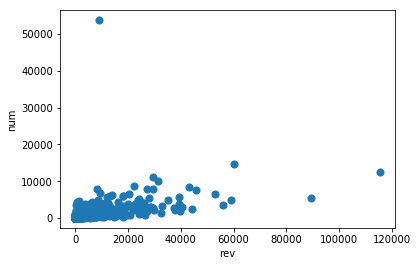

In [9]:
import matplotlib.pyplot as plt
df_inn.plot.scatter(x = "rev", y = "num", s = 50, c = None)
plt.show()

In [10]:
def split(df, y_prediction):
    from sklearn.model_selection import train_test_split

    X = np.array(df.drop([y_prediction], axis=1))
    y = np.array(df[[y_prediction]])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print('Number of training: %d' % X_train.shape[0])
    print('Number of testing: %d' % X_test.shape[0])
    return X_train, X_test, y_train, y_test

def training(model, y_train):
    from sklearn.model_selection import cross_val_score
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv = 10)
    print('cross_val_score : %.2f' % (np.sum(score) / 10))

def testing(model, y_test):
    y_pred = model.predict(X_test)
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    
    from sklearn.metrics import accuracy_score
    print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))
    return y_pred

def testing_regression(model, y_test):
    pred = model.predict(X_test).reshape(y_test.shape[0], 1)  
    y_test = y_test.reshape(X_test.shape[0], 1)
    
    score = np.dot((pred - y_test).T, (pred - y_test))
    from sklearn.metrics import mean_squared_error
    score1 = mean_squared_error(y_test, pred, sample_weight = None, multioutput = 'uniform_average')
    print('===Euclidean_Distance===')
    print(score[0])
    print('===MSE===')
    print(score1)
    return pred

def plot_regression(test, pred):
    import matplotlib.pyplot as plt
    
    test = test.reshape(pred.shape[0],1)
    a = np.append(pred, test, axis=1)
    b = pd.DataFrame(a)
    b.columns = ["pred", "test"]  
    b.plot.scatter(x = 'test', y = 'pred', s = 50, alpha = 0.8)
    plt.title("scatter plot of pridiction and true")
    plt.show()


In [11]:
t = 180
con = (df_inn.rev > t)# & (df_inn.num < 15000)
print(df_inn[con].shape)
big = df_inn[con]
big.sum(axis = 0)

(6739, 3)


rev     9630713.19
pid    76030429.00
num     2276832.00
dtype: float64

In [12]:
df_inn.sum(axis = 0)

rev    1.033771e+07
pid    2.415787e+08
num    2.756003e+06
dtype: float64

In [13]:
df = df0[df0.day < 62]

In [14]:
df3 = pd.merge(df, df_inn, how='inner', on=['pid'])
df3 = df3.sort(columns = "lineID", axis = 0, ascending = True, inplace = False, kind = 'quicksort', na_position = 'last')
df3.head()

/Users/Shawn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,day,pid,click,basket,order,revenue,lineID,number,group,unit,...,competitorPrice,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,rev,num
0,1,6570,1,0,0,0.00,0,0.0,2FOI,ML,...,0.055180,0.044533,0.238274,0.0,0.0,0.470588,0.044900,0.002261,119.88,64
39,1,14922,0,1,0,0.00,1,0.0,1COJ0FIK,ST,...,0.032390,0.023045,0.015947,1.0,0.0,0.159314,0.046283,0.002261,4829.43,2333
1678,1,16382,0,1,0,0.00,2,0.0,22OI7,ML,...,0.055822,0.042342,0.037523,0.0,1.0,0.095588,0.045468,0.004534,49.49,27
1705,1,1145,0,0,1,6.55,3,1.0,18OZ00IS,G,...,0.024906,0.017238,0.047842,0.0,0.0,0.058824,0.022820,0.002716,9497.50,6833
5917,1,3394,0,0,1,4.14,4,1.0,20OI0,ST,...,0.016592,0.010876,0.083490,0.0,1.0,0.031863,0.019906,0.002261,877.68,444


In [15]:
###  con1 = (df3.rev > t) & (df3.order == 1) & (df3.rev < 40000)

print(df3[(df3.rev > t) & (df3.order == 1)].shape)
df_big = df3[(df3.rev > t) & (df3.order == 1)]
df_big.head()

(414911, 25)


,day,pid,click,basket,order,revenue,lineID,number,group,unit,...,competitorPrice,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,rev,num
1705,1,1145,0,0,1,6.55,3,1.0,18OZ00IS,G,...,0.024906,0.017238,0.047842,0.0,0.000000,0.058824,0.022820,0.002716,9497.50,6833
5917,1,3394,0,0,1,4.14,4,1.0,20OI0,ST,...,0.016592,0.010876,0.083490,0.0,1.000000,0.031863,0.019906,0.002261,877.68,444
6193,1,3661,0,0,1,10.03,5,1.0,13OX06,ML,...,0.051627,0.026424,0.083490,0.0,0.923077,0.308824,0.053174,0.045444,3444.38,475
6486,1,3856,0,0,1,3.58,6,1.0,13OK0FOK,G,...,0.011452,0.009398,0.077861,0.0,0.000000,0.218137,0.013707,0.000898,9186.28,4015
11018,1,14010,0,0,1,19.71,12,1.0,13OZ0EOI,ST,...,0.074795,0.051977,0.076923,0.0,1.000000,0.894608,0.062312,0.000034,969.38,651


In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, 
                            max_features = 'log2', 
                            criterion = 'mse', 
                            max_depth = None, 
                            min_samples_split = 20, 
                            min_samples_leaf = 10, 
                            min_weight_fraction_leaf = 0.0, 
                            max_leaf_nodes = None, 
                            min_impurity_split = 1e-07, 
                            bootstrap = True, 
                            oob_score = True, 
                            n_jobs = 1, 
                            random_state = 0, 
                            verbose = 0, 
                            warm_start = False)

In [17]:
df0[df0.order == 1].shape

(705090, 23)

購買商品總收益 > t, order=1的回歸。

In [34]:
df1 = df3.drop(["day", "pid", 'lineID', "click", "basket", "revenue", "number", "group", "pharmForm", "unit", 'campaignIndex', "cluster", 'rev', 'num'], axis=1)
print(df1.shape)
print(df1["order"].value_counts())

df2 = df3.drop(["day", "pid", 'lineID', "click", "basket", "order", "number", "group", "pharmForm", "unit", "cluster",'campaignIndex', 'rev', 'num'], axis=1)
print(df2.shape)
X_train, X_test, y_train, y_test = split(df2, "revenue")
training(rfr, y_train)

(1746818, 11)
0    1285304
1     461514
Name: order, dtype: int64
(1746818, 11)
Number of training: 1397454
Number of testing: 349364


/Users/Shawn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


cross_val_score : 0.12


===Euclidean_Distance===
[ 32702117.87786867]
===MSE===
93.6047156486


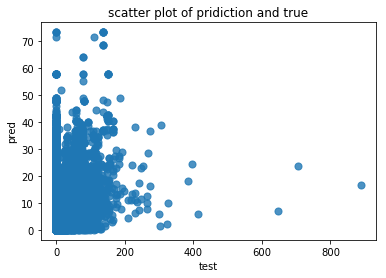

In [35]:
pred = testing_regression(rfr, y_test)
plot_regression(y_test, pred)

In [36]:
z = df0[df0.day > 61]
z.shape

(1009185, 23)

In [45]:
X_z.shape, y_z.shape, pre_z.shape

((1009185, 10), (1009185, 1), (1009185,))

In [ ]:
X_z = np.array(z[[u'adFlag', u'availability', u'competitorPrice', u'price',
                  u'manufacturer', u'genericProduct', u'salesIndex', u'category', u'rrp',
                  u'Content']])
y_z = np.array(z[["revenue"]])
pre_z = rfr.predict(X_z)
pred = pre_z
y_test = y_z
score = np.dot((pred - y_test).T, (pred - y_test))
print('===Euclidean_Distance===')
print(score[0])
score1 = mean_squared_error(y_test, pred, sample_weight = None, multioutput = 'uniform_average')
print('===MSE===')
print(score1)

all: (order=1)86.5  
50up: (order=1)87  
100up: (order=1)85  
150up: (order=1)83.3  
180up: (order=1)77.9  
190up: (order=1)80.1  
200up: (order=1)80.95  
250up: (order=1)87.6  
2000up: 135, 0.56  
5000up: 166, 0.56, order=1(110)  
5000up, 40000below: 142, 0.61

In [20]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator = rfr,
                      n_estimators = 100,
                      max_samples = 1.0,
                      max_features = 1.0,
                      bootstrap = True,
                      bootstrap_features = False,
                      oob_score = False,
                      warm_start = False,
                      n_jobs = 1,
                      random_state = 0,
                      verbose = 0)
training(br, y_train)

/Users/Shawn/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
pred_br = testing_regression(br, y_test)
plot_regression(y_test, pred_br)

In [20]:
df0_month = pd.read_csv("DATA/DMC_2017_task/month_order.csv")
df0_month.head()

,lineID,prob
0,1700002,0.800000
1,1700003,0.000000
2,1700004,0.316837
3,1700005,0.127030
4,1700006,0.334790


In [21]:
re_val = pd.merge(df0, df0_month, how='inner', on=['lineID'])
reg_val = re_val[re_val.prob > 0]
print(reg_val.shape)

(774949, 24)


In [22]:
reg_val.columns

Index([u'day', u'pid', u'click', u'basket', u'order', u'revenue', u'lineID',
       u'number', u'group', u'unit', u'pharmForm', u'campaignIndex',
       u'cluster', u'adFlag', u'availability', u'competitorPrice', u'price',
       u'manufacturer', u'genericProduct', u'salesIndex', u'category', u'rrp',
       u'Content', u'prob'],
      dtype='object')

In [23]:
reg_val1 = reg_val.drop(["day","pid",'cluster','number','lineID','click','basket','order','revenue',"group","pharmForm","unit",'campaignIndex','prob'], axis=1)
prediction = pd.DataFrame(rfr.predict(reg_val1))
prediction.columns = ["revenue"]
prediction.head()

,revenue
0,26.062774
1,7.741870
2,19.553535
3,12.311171
4,10.136568


In [24]:
reg_val = reg_val.reset_index(level = None, drop = False, inplace = False, col_level = 0, col_fill='')
prediction["lineID"] = reg_val.lineID
prediction.head()

,revenue,lineID
0,26.062774,1700002
1,7.741870,1700004
2,19.553535,1700005
3,12.311171,1700006
4,10.136568,1700008


In [25]:
re_val = re_val.merge(prediction, how='outer', on=['lineID'])
re_val.head()

,day,pid,click,basket,order,revenue_x,lineID,number,group,unit,...,competitorPrice,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,prob,revenue_y
0,60,17137,1,0,0,0.0,1700002,0.0,21OIG,ST,...,0.070713,0.066971,0.331144,0.0,1.0,0.507353,0.067622,0.005443,0.800000,26.062774
1,60,8446,1,0,0,0.0,1700003,0.0,14OH2F,ST,...,0.207755,0.159522,0.145403,0.0,0.0,0.242647,0.189948,0.009080,0.000000,NaN
2,60,4265,1,0,0,0.0,1700004,0.0,2FOI,G,...,0.024869,0.018690,0.000000,0.0,0.0,0.644608,0.024154,0.000443,0.316837,7.741870
3,60,21003,1,0,0,0.0,1700005,0.0,18OZ0FIO,G,...,0.038475,0.037564,0.233583,0.0,0.0,0.058824,0.048679,0.006807,0.127030,19.553535
4,60,17221,1,0,0,0.0,1700006,0.0,20OHE,ST,...,0.062323,0.028853,0.077861,0.0,1.0,0.784314,0.107829,0.000034,0.334790,12.311171


In [26]:
r1 = re_val.revenue_y.fillna(value = 1)
r1 = pd.to_numeric(r1, errors = 'coerce')
r2 = pd.to_numeric(re_val.prob, errors = 'coerce')
re_val["exp"] = r1*r2
re_val.head()

,day,pid,click,basket,order,revenue_x,lineID,number,group,unit,...,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,prob,revenue_y,exp
0,60,17137,1,0,0,0.0,1700002,0.0,21OIG,ST,...,0.066971,0.331144,0.0,1.0,0.507353,0.067622,0.005443,0.800000,26.062774,20.850219
1,60,8446,1,0,0,0.0,1700003,0.0,14OH2F,ST,...,0.159522,0.145403,0.0,0.0,0.242647,0.189948,0.009080,0.000000,NaN,0.000000
2,60,4265,1,0,0,0.0,1700004,0.0,2FOI,G,...,0.018690,0.000000,0.0,0.0,0.644608,0.024154,0.000443,0.316837,7.741870,2.452912
3,60,21003,1,0,0,0.0,1700005,0.0,18OZ0FIO,G,...,0.037564,0.233583,0.0,0.0,0.058824,0.048679,0.006807,0.127030,19.553535,2.483880
4,60,17221,1,0,0,0.0,1700006,0.0,20OHE,ST,...,0.028853,0.077861,0.0,1.0,0.784314,0.107829,0.000034,0.334790,12.311171,4.121663


In [27]:
re_val.columns
re_val.exp.shape, re_val.revenue_x.shape

((1056001,), (1056001,))

In [31]:
pred = np.array(re_val.exp).reshape(re_val.exp.shape[0], 1)
y_test = np.array(re_val.revenue_x).reshape(re_val.revenue_x.shape[0], 1)
score = np.dot((pred - y_test).T, (pred - y_test))
print('===Euclidean_Distance===')
print(score[0])

===Euclidean_Distance===
[  1.23418502e+08]


In [33]:
from sklearn.metrics import mean_squared_error
score1 = mean_squared_error(y_test, pred, sample_weight = None, multioutput = 'uniform_average')
print('===MSE===')
print(score1)    

===MSE===
116.873470292


###

In [119]:
df0_t = pd.read_csv("DATA/DMC_2017_task/test_clean.csv")
df0_t.head()

,Unnamed: 0,lineID,day,pid,group,unit,pharmForm,campaignIndex,cluster,adFlag,availability,competitorPrice,price,manufacturer,genericProduct,salesIndex,category,rrp,Content
0,0,1,93,4772,1DOIF0ZO,ML,ATR,D,2.0,0.0,0.000000,0.031271,0.031271,0.351782,0.0,1.0,0.093137,0.041813,0.000443
1,1,2,93,11548,13OX00OI,ML,LOE,D,1.0,0.0,0.333333,0.022329,0.022329,0.144465,0.0,0.0,0.294118,0.022178,0.013625
2,2,3,93,1958,13OS00,G,SAL,D,1.0,0.0,0.000000,0.026982,0.026982,0.343340,0.0,0.0,0.512255,0.036330,0.000670
3,3,4,93,15071,20OH0,ST,BAN,A,0.0,0.0,0.333333,0.042735,0.042735,0.351782,0.0,1.0,0.208333,0.054038,0.000216
4,4,5,93,2117,1COS30OQ,ML,SIR,B,1.0,0.0,0.000000,0.014141,0.014141,0.029081,0.0,0.0,0.517157,0.020178,0.005443


In [120]:
df0_or = pd.read_csv("DATA/DMC_2017_task/class_order.csv")
df0_or.head()

,lineID,prob
0,1,0.000000
1,2,0.000000
2,3,0.162257
3,4,0.000000
4,5,0.234704


In [133]:
result = pd.merge(df0_t, df0_or, how='inner', on=['lineID'])
del result["Unnamed: 0"]
print(result.shape)

(1210767, 19)


In [147]:
reg = result[result.prob > 0.5]
print(reg.shape)

(162993, 21)


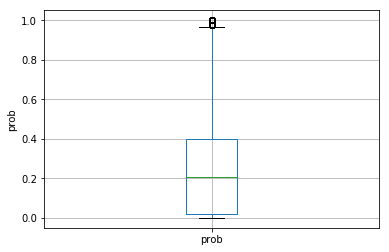

In [148]:
import pylab

result.boxplot('prob')
pylab.ylabel('prob')
plt.show()

In [135]:
reg1 = reg.drop(["day", "pid", 'lineID', "group", "pharmForm", "unit", 'campaignIndex'], axis=1)
pre_reg1 = pd.DataFrame(br.predict(reg1))
pre_reg1.columns = ["Revenue"]

In [136]:
reg = reg.reset_index(level = None, drop = False, inplace = False, col_level = 0, col_fill='')
pre_reg1["lineID"] = reg.lineID

In [137]:
result = result.merge(pre_reg1, how='outer', on=['lineID'])
result.head()

,lineID,day,pid,group,unit,pharmForm,campaignIndex,cluster,adFlag,availability,competitorPrice,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,prob,Revenue
0,1,93,4772,1DOIF0ZO,ML,ATR,D,2.0,0.0,0.000000,0.031271,0.031271,0.351782,0.0,1.0,0.093137,0.041813,0.000443,0.000000,NaN
1,2,93,11548,13OX00OI,ML,LOE,D,1.0,0.0,0.333333,0.022329,0.022329,0.144465,0.0,0.0,0.294118,0.022178,0.013625,0.000000,NaN
2,3,93,1958,13OS00,G,SAL,D,1.0,0.0,0.000000,0.026982,0.026982,0.343340,0.0,0.0,0.512255,0.036330,0.000670,0.162257,20.808923
3,4,93,15071,20OH0,ST,BAN,A,0.0,0.0,0.333333,0.042735,0.042735,0.351782,0.0,1.0,0.208333,0.054038,0.000216,0.000000,NaN
4,5,93,2117,1COS30OQ,ML,SIR,B,1.0,0.0,0.000000,0.014141,0.014141,0.029081,0.0,0.0,0.517157,0.020178,0.005443,0.234704,16.978521


In [138]:
from IPython.display import display
display(result.Revenue.isnull().sum())

295334

In [139]:
r1 = result.Revenue.fillna(value = 1)
r1 = pd.to_numeric(r1, errors = 'coerce')
r2 = pd.to_numeric(result.prob, errors = 'coerce')
result["exp"] = r1*r2
result.head(100)

,lineID,day,pid,group,unit,pharmForm,campaignIndex,cluster,adFlag,availability,...,price,manufacturer,genericProduct,salesIndex,category,rrp,Content,prob,Revenue,exp
0,1,93,4772,1DOIF0ZO,ML,ATR,D,2.0,0.0,0.000000,...,0.031271,0.351782,0.0,1.000000,0.093137,0.041813,0.000443,0.000000,NaN,0.000000
1,2,93,11548,13OX00OI,ML,LOE,D,1.0,0.0,0.333333,...,0.022329,0.144465,0.0,0.000000,0.294118,0.022178,0.013625,0.000000,NaN,0.000000
2,3,93,1958,13OS00,G,SAL,D,1.0,0.0,0.000000,...,0.026982,0.343340,0.0,0.000000,0.512255,0.036330,0.000670,0.162257,20.808923,3.376395
3,4,93,15071,20OH0,ST,BAN,A,0.0,0.0,0.333333,...,0.042735,0.351782,0.0,1.000000,0.208333,0.054038,0.000216,0.000000,NaN,0.000000
4,5,93,2117,1COS30OQ,ML,SIR,B,1.0,0.0,0.000000,...,0.014141,0.029081,0.0,0.000000,0.517157,0.020178,0.005443,0.234704,16.978521,3.984928
5,6,93,21129,22OI5,ML,CRE,D,2.0,0.0,0.000000,...,0.017000,0.981238,0.0,1.000000,0.046569,0.021511,0.002261,0.204419,9.935879,2.031084
6,7,93,8977,1COJ00OZ,ST,TAB,C,1.0,0.0,0.000000,...,0.005563,0.015947,1.0,0.000000,0.115196,0.010669,0.000898,0.110440,13.125924,1.449624
7,8,93,5654,1AOK0FOS,ML,LOE,D,2.0,0.0,0.000000,...,0.034130,0.384615,0.0,0.307692,0.245098,0.040454,0.004534,0.000000,NaN,0.000000
8,9,93,3274,14OZ2F,G,CRE,D,1.0,1.0,0.000000,...,0.028438,0.328330,0.0,0.000000,0.014706,0.040454,0.002261,0.173810,12.453116,2.164470
9,10,93,15423,21OK2,ST,TAB,D,0.0,0.0,0.000000,...,0.028438,0.408068,0.0,1.000000,0.556373,0.039220,0.005443,0.178539,21.776354,3.887928


In [142]:
result.Revenue = result.Revenue.fillna(value = result.prob)
final_ans = result.iloc[:, [0, 20]]
final_ans.columns = ["lineID", "revenue"]
print(final_ans.head())

   lineID   revenue
0       1  0.000000
1       2  0.000000
2       3  3.376395
3       4  0.000000
4       5  3.984928


In [143]:
final_ans.to_csv("Uni_NCTU_1(1).csv", sep = "|", index = False)